Цель: необходимо использовать датасет с прошлой практической работы и визуализировать данные в виде графиков с помощью matplotlib. Использовать: линейные графики, столючатые диаграммы, круговые диаграммы, диаграммы рассеяния, гистограммы. Применить изменение маркеров, цвета, размера.

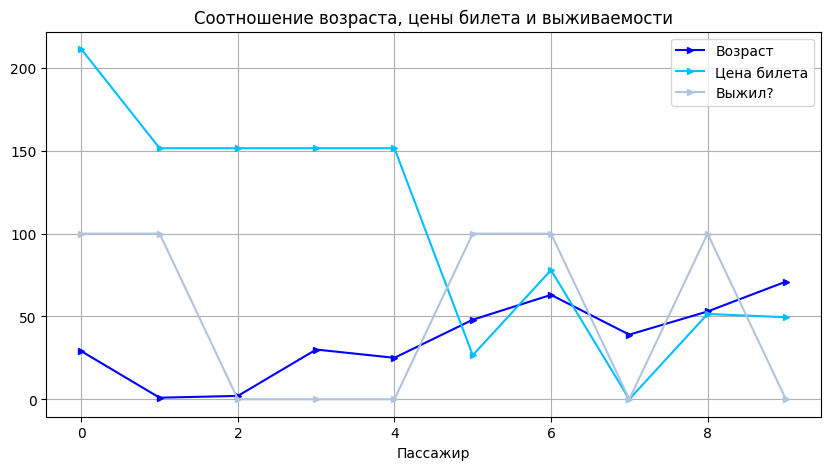

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

plt.figure(figsize=(10,5))
titanic = pd.read_csv("titanic_new.csv")
titanic = titanic.replace({"survived":1}, 100)

plt.plot(titanic['#'].head(10), titanic['age'].head(10), color='blue', marker='>', markersize=4, label='Возраст')
plt.plot(titanic['#'].head(10), titanic['fare'].head(10), color='deepskyblue', marker='>', markersize=4, label='Цена билета')
plt.plot(titanic['#'].head(10), titanic['survived'].head(10), color='lightsteelblue', marker='>', markersize=4, label='Выжил?')
plt.title('Соотношение возраста, цены билета и выживаемости')
plt.xlabel('Пассажир')
plt.grid()
plt.legend()
plt.show()


1. Линейные графики
Рассмотрим 10 пассажиров и установим связь между возрастом, ценой билета и выживаемостью с помощью линейных графиков. Из 10 пассажиров выжило 5, из этих пассажиров один младенец, один человек 30 лет и трое старше 50, при этом у первых двух билет высокого ценового сегмента. Лишь у одного выжившего дешёвый билет. Делаем вывод, что выжить с дешёвым билетом было затруднительно (это связано с тем, что 3 класс находился дальше всего от спасательных шлюпок). Сейчас тяжело сделать выводы насчёт связи возсраста с выживаемостью, оставим это для другого графика.

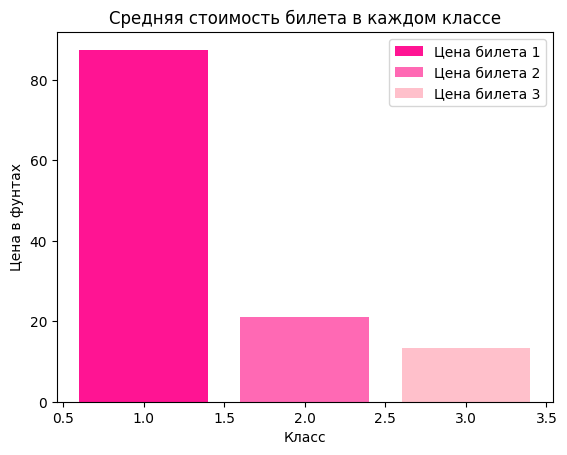

In [2]:
fare=[titanic.loc[titanic['pclass'] == 1, 'fare'].mean(),titanic.loc[titanic['pclass'] == 2, 'fare'].mean(),titanic.loc[titanic['pclass'] == 3, 'fare'].mean()]
plt.bar(1, fare[0], label='Цена билета 1', color='deeppink')
plt.bar(2, fare[1], label='Цена билета 2', color='hotpink')
plt.bar(3, fare[2], label='Цена билета 3', color='pink')
plt.title('Средняя стоимость билета в каждом классе')
plt.xlabel('Класс')
plt.ylabel('Цена в фунтах')

plt.legend()
plt.show()


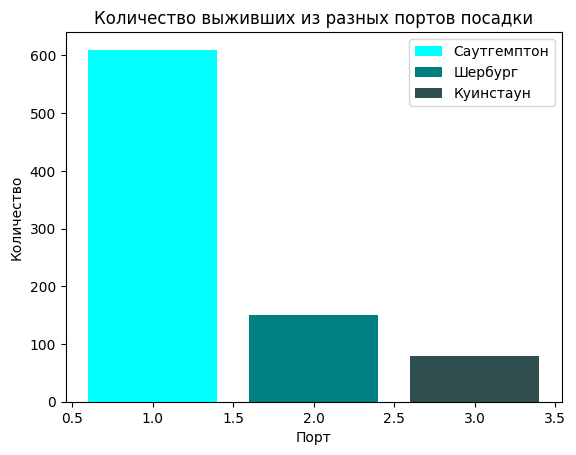

In [11]:
emb=[titanic.loc[titanic['embarked'] == 'S', 'survived'].value_counts(),titanic.loc[titanic['embarked'] == 'C', 'survived'].value_counts(),titanic.loc[titanic['embarked'] == 'Q', 'survived'].value_counts()]\

# titanic.plot(x="embarked", y=[titanic["survived"]=='1', titanic["survived"]=='0'], kind="bar", color=['cyan', 'darkslategray'])


plt.bar(1, emb[0], label='Саутгемптон', color='cyan')
plt.bar(2, emb[1], label='Шербург', color='teal')
plt.bar(3, emb[2], label='Куинстаун', color='darkslategray')
plt.title('Количество выживших из разных портов посадки')
plt.xlabel('Порт')
plt.ylabel('Количество')

plt.legend()
plt.show()

2. Столбчатые диаграммы.
Изобразим среднюю стоимость билетов разных классов. Для этого придется создать отдельный массив, где мы применим .mean() для вычисления среднего значения. Также наш графикна самом деле будет наложением трёх столбчатых диаграмм. Из графика делаем вывод, что средняя цена билета в первый класс - около 90 фунтов(с учётом тех, кто поплыл бесплатно), во второй класс -20 фунтов, а в третий - 10 фунтов. На самом деле ценовой разброс был умопомрачителен, так как из прошлой работы мы знаем, что самы дорогие билеты стоили аж 512 фунтов и принадлежали семье Кардеза с их прислугой. Следующими по цене были билеты в 2 раза дешевле! Переводя в наши деньги - билет в 1 класс стоил бы около 7 миллионов, а в третий - 70 тысяч рублей.
Второй график отображает количество выживших людей севших на борт из разных портов. В целом тут нечего сказать, в Саутгемптоне просто напросто село большинство пассажиров.

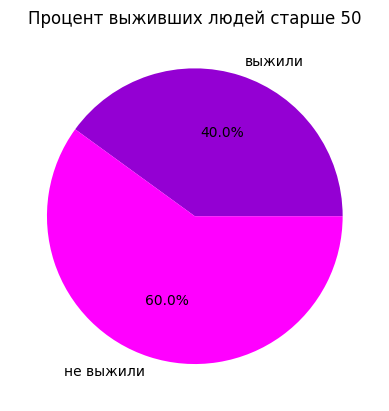

In [4]:
# people = [((titanic['survived'] == 100) & (titanic['age']>=50)), ((titanic['survived'] == 0) & (titanic['age']<50)).value_counts()]
# # people = [((titanic['survived'] == 100))]

# people[0].loc[people[0] == True]
# people[0].loc[people[0] == False]

people = titanic.loc[titanic["age"] >= 50]
people.loc[people["survived"] == 100]

data = [len(people.loc[people["survived"] == 100]), len(people.loc[people["survived"] == 0])]

label=['выжили', 'не выжили']
plt.pie(data, labels=label, autopct='%1.1f%%', colors=['darkviolet', 'magenta'])
plt.title('Процент выживших людей старше 50')
plt.show()

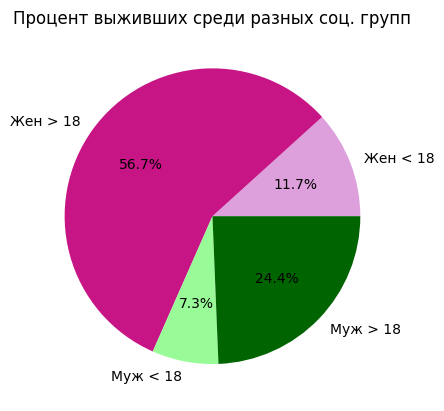

In [5]:
people = titanic.loc[titanic["survived"] == 100]
women = people.loc[titanic['sex']== 'female']
men = people.loc[titanic['sex']== 'male']

data = [len(women.loc[women["age"] < 18]), len(women.loc[women["age"] >= 18]), len(men.loc[men["age"] < 18]), len(men.loc[men["age"] >= 18])]

label=['Жен < 18', 'Жен > 18', 'Муж < 18', 'Муж > 18']
plt.pie(data, labels=label, autopct='%1.1f%%', colors=['plum','mediumvioletred', 'palegreen','darkgreen'])
plt.title('Процент выживших среди разных соц. групп')
plt.show()

3. Круговые диаграммы
Для того, чтобы в первой диаграмме отобразить процентв выживших людей исключительно старше 50 лет, мы создадим другой датафрейм, куда, с помощью .loc(), запишем только пассажиров старше 50. Теперь в условиях круговой диаграммы пропишем, что первая часть круга - выжившие, а вторая - нет. По статистике оказалось, что лишь 40 процентов пожилых выжило.
Во второй диаграмме рассмотрим выживших других групп пассажиров. Отделим из изначального датафрейма выживших, после этого разделим их на мужчин и женщин. А в условиях диаграммы разделим мужчин и женщин на детей и взрослых. Получается, что большинство переживших катострофу - женщины старше 18 лет, а вместе с детьми они составляют 3/4 от всех выживших. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


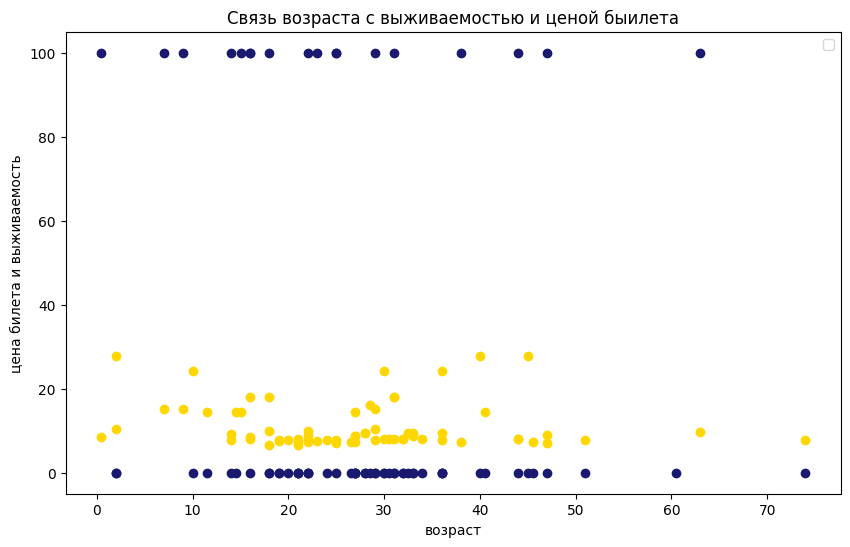

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(titanic['age'].tail(100), titanic['fare'].tail(100), color= 'gold')
plt.scatter(titanic['age'].tail(100), titanic['survived'].tail(100), color= 'midnightblue')

plt.title('Связь возраста с выживаемостью и ценой быилета')
plt.xlabel('возраст')
plt.ylabel('цена билета и выживаемость')

plt.legend()
plt.show()

4. Диаграммы рассеивания
В этой диагрмме мы наложим 2 рассеивания друг на друга и проследим закономерность. Среди взятых 100 человек большинство погибших около 30 лет, а большинство выживших - около 20. При этом очень много людей из 3 класса, где стоимость билета меньше 10 фунтов. Эта кучка точек находится с предыдущим скоплением погибших. Подтверждается тот факт, что чем дешевле билет - тем ниже шанс выжить.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


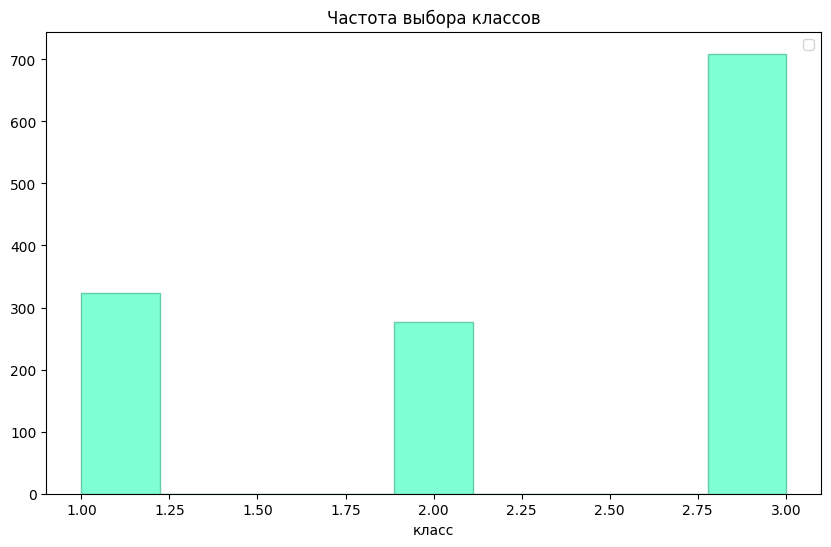

In [7]:
plt.figure(figsize=(10,6))
plt.hist(titanic['pclass'], bins = 9, color= 'aquamarine', edgecolor= 'mediumaquamarine')
# plt.hist((titanic['pclass']==2).tail(100), bins = 100, color= 'turquoise', edgecolor= 'darkturquoIse')
# plt.hist((titanic['pclass']==3).tail(100), bins = 100, color= 'mediumspringgreen', edgecolor= 'mediumseagreen')

# plt.scatter(titanic['age'].tail(100), titanic['survived'].tail(100), color= 'midnightblue')

plt.title('Частота выбора классов')
plt.xlabel('класс')

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


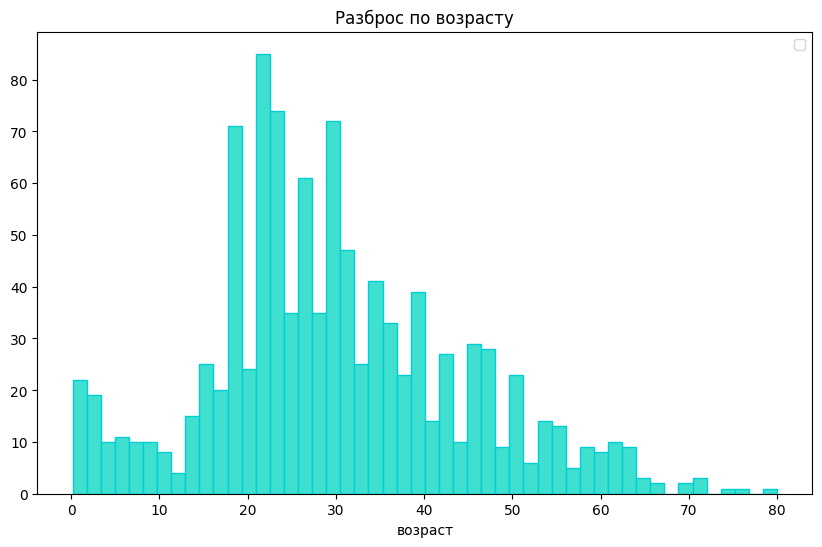

In [8]:
plt.figure(figsize=(10,6))
plt.hist(titanic['age'], bins = 50, color= 'turquoise', edgecolor= 'darkturquoIse')

plt.title('Разброс по возрасту')
plt.xlabel('возраст')

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


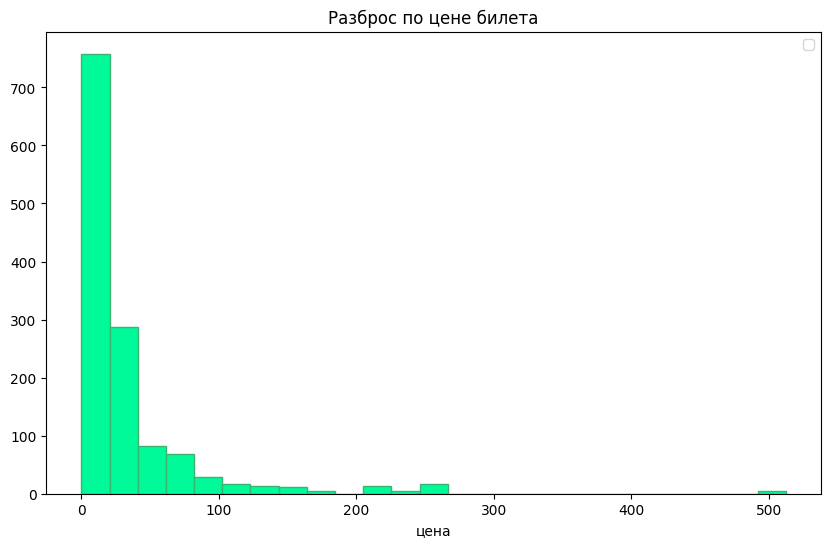

In [9]:
plt.figure(figsize=(10,6))
plt.hist(titanic['fare'], bins = 25, color= 'mediumspringgreen', edgecolor= 'mediumseagreen')

plt.title('Разброс по цене билета')
plt.xlabel('цена')

plt.legend()
plt.show()

5. Гистограммы
Первая гистограмма показывает сколько человек выбрали каждый из классов. Третий оказывается самым популярным выбором (хотя я не понимаю почему, там были ужасные условия. Лучше бы вообще не плыли). Вторая отображает количество людей различных возрастов. Самая большая группа - люди от 19 до 31 года. Меньше всего стариков старше 60 лет. Третья гистограмма показывает количество билетов разной цены. Тут пожтверждаются наши выводы из предыдущей работы, о том, что самый дорогой билет стоил 512 фунтов, при этом по цене от 250 до 500 фунтов билетов ыообще нет. Больше всего билетов, которые дешевле 50 фунтов.

Вывод: изучена библиотека matplotlib, построение линейных графиков, столбчатых, круговых диаграмм, диаграмм рассеивания и гистрограмм. Мы выяснили, что выживаемость повышалась у людей среднего возраста, а также у тех, кто заплатил за билет дороже. Больше всего людей сели на борт в порту Саунтгемптон. Больше всего было пассажиров третьего класса (их билет в среднем стоил около 10 фунтов) и возрастом от 19 до 31 года. Мужчины составляли лишь четверть всех выживших пассажиров.